In [13]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


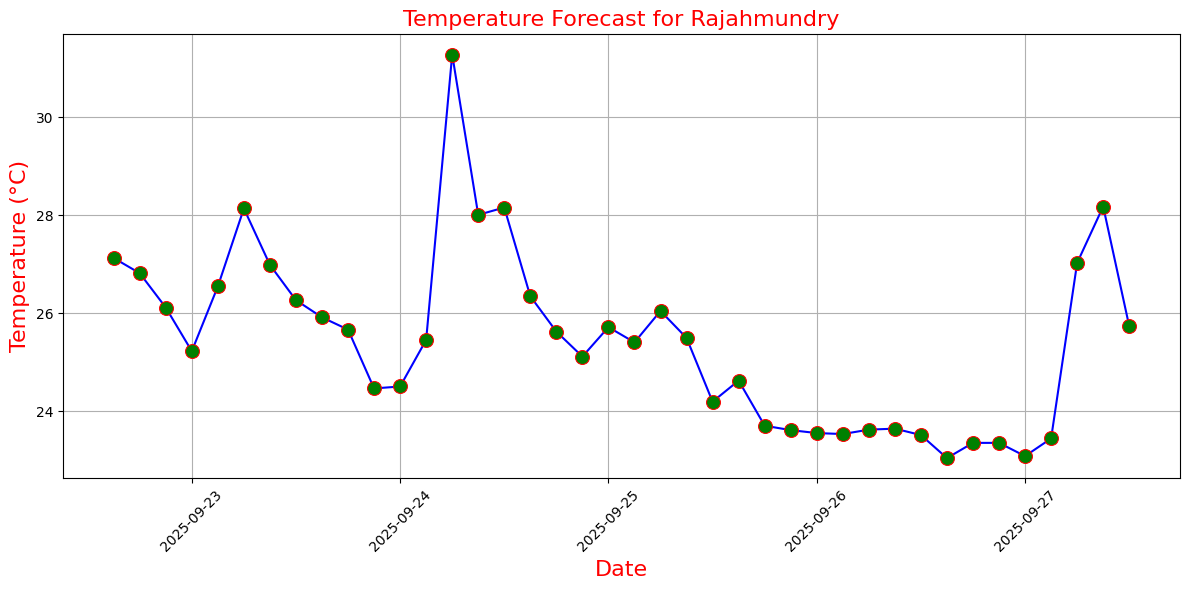

In [ ]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -------->>> CONFIG <<<--------
API_KEY = "09b9292aedec9b92462c7b39084ce984" 
CITY = "Rajahmundry"
URL = f"https://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"

# -------->>> FETCH DATA <<<--------
response = requests.get(URL)
data = response.json()

# -------->> PARSE DATA <<--------
forecast_list = data["list"]
dates = [entry["dt_txt"] for entry in forecast_list]
temps = [entry["main"]["temp"] for entry in forecast_list]

# Create DataFrame
df = pd.DataFrame({
    "DateTime": pd.to_datetime(dates),
    "Temperature (°C)": temps
})

#  --------->>> VISUALIZATIO <<<----------
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="DateTime", y="Temperature (°C)", marker="o", ms = 10, mec ='r', mfc = 'g', color="blue")
plt.title(f"Temperature Forecast for {CITY}", color = 'r', fontsize=16)
plt.xlabel("Date",color = 'r',fontsize = 16 )
plt.ylabel("Temperature (°C)",color = 'r',fontsize = 16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()